In [11]:
这篇主要用来分析下”长赢指数投资“150份中的品种相关性，还有其他基类行业指数成长性的对比。

绘图部分没有采用默认的pyecharts，而是用常规的seaborn。

首先初始化库和seaborn绘图环境

In [12]:
import xalpha as xa
import jqdatasdk as jq
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei') # 解决Seaborn中文显示问题

# seaborn默认只能显示6个曲线，扩充到11个
dash_styles = ["",
    (4, 1.5),
    (1, 1),
    (3, 1, 1.5, 1),
    (5, 1, 1, 1),
    (5, 1, 2, 1, 2, 1),
    (2, 2, 3, 1.5),
    (1, 2.5, 3, 1.2),
    (1, 3.5, 3, 1.2),
    (2, 2.5, 3, 1.2),
    (1, 1.5, 3, 1.2),
    (5, 1, 2, 1, 2, 1),
]


In [ ]:
封装一个函数，传入品种代号后，自动输出相关性和收益对比曲线

In [15]:
#默认取2010开始的数据
def comp(indices_dict, title, start='2010-01-01'):
    comp = xa.Compare(*indices_dict.keys(), start=start)
    data_corr = comp.corr()
    #格式化列名和index
    data_corr.columns = [indices_dict[name] for name in data_corr.columns]
    data_corr.index = data_corr.columns

    #两个画布
    fig, axes = plt.subplots(2,1, figsize=(15,12)) 
    #相关性
    corr_g = sns.heatmap(data_corr, ax=axes[0], cmap="RdBu_r", annot=True, fmt='.2f', linewidths=0.1, alpha=0.7)
    corr_g.set_title('相关性比较')
    #收益率
    data_trend = comp.totdf
    data_trend.index = data_trend['date']
    #忽略第一列的date
    data_trend = data_trend.iloc[:,1:]
    #格式化列名
    data_trend.columns = [indices_dict[code] for code in data_trend.columns]
    #收益率画图
    trend_g = sns.lineplot(data=data_trend, ax=axes[1], dashes=dash_styles)
    trend_g.set_title('增长率比较')

    plt.suptitle(title, fontsize=16)
    plt.show()



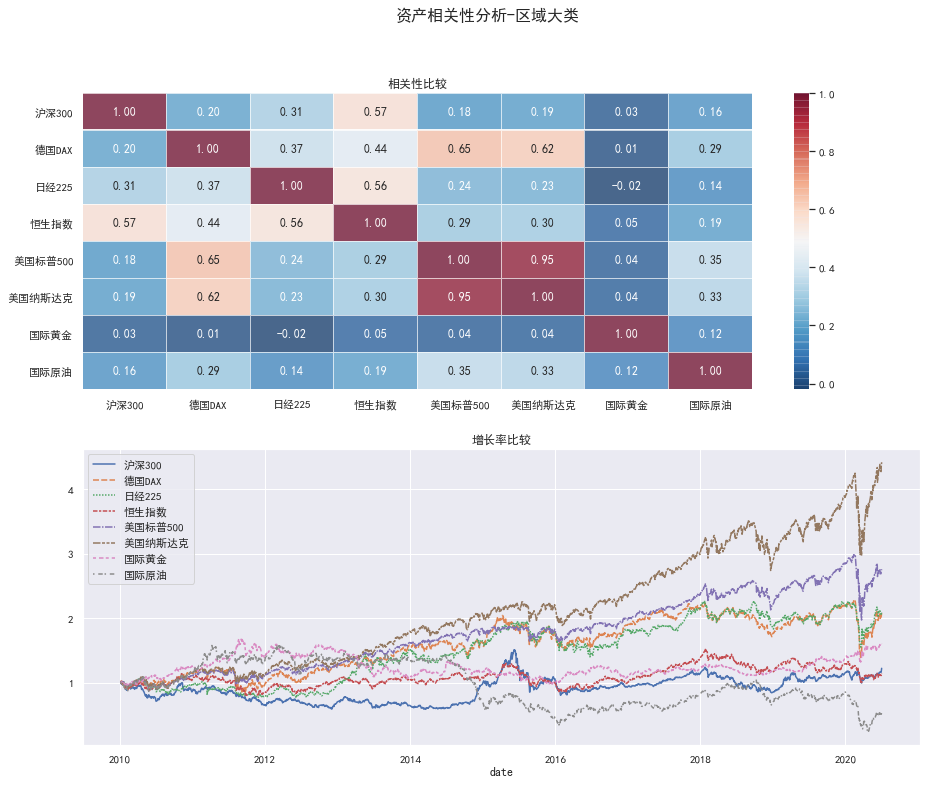

In [16]:
# 资产大类-区域相关性分析

region_indices = {
    'SH000300': '沪深300',
    'indices/germany-30': '德国DAX',
    'indices/japan-ni225': '日经225',
    'indices/hang-sen-40': '恒生指数',
    'indices/us-spx-500': '美国标普500',
    'indices/nasdaq-composite': '美国纳斯达克',
    'commodities/gold': '国际黄金',
    'commodities/brent-oil': '国际原油'
}

comp(region_indices, title='资产相关性分析-区域大类')

In [ ]:
上图可以看出，150份中的大类资产相关性非常完美。

纳斯达克相比标普500增长性更高（回撤自然也会大些），偏好激进方案的可以将其调整为纳斯达克指数。

相比较，沪深300的增长性确实感人。

再看国内宽基的比较，

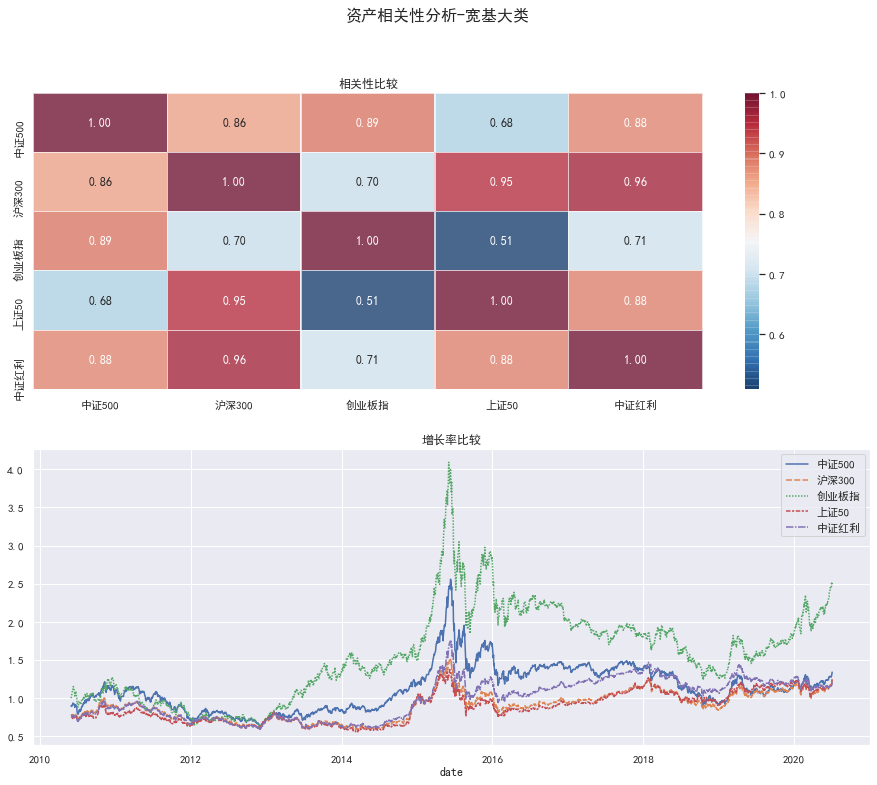

In [17]:
kuan_indices = {
    'SH000905': '中证500',
    'SH000300': '沪深300',
    'SZ399006': '创业板指',
    'SH000016': '上证50',
    'SH000922': '中证红利',
}
comp(kuan_indices, title='资产相关性分析-宽基大类')

In [ ]:
这里面可以看出沪深300跟其他指数相关性较大，尤其是和中证红利，无论是相关性还是增长率，走势几乎重叠。

我觉得可以将沪深300替换为红利，毕竟我们有了中证500，红利指数本身有分红收益。

再看下窄基行业指数的比较。

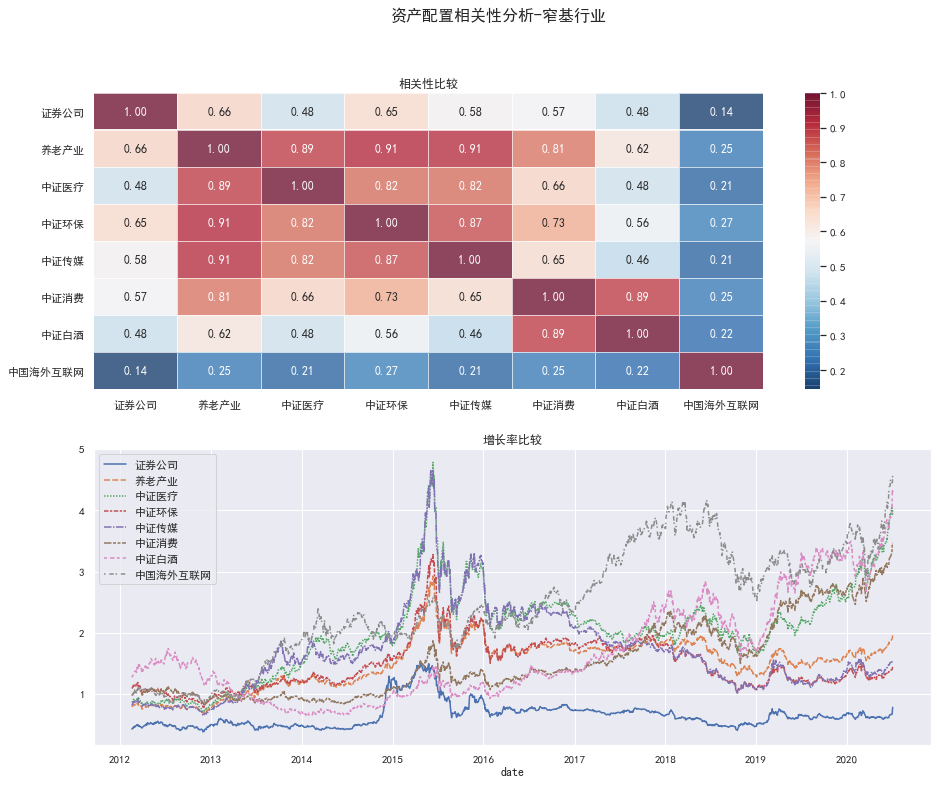

In [18]:
hangye_indices = {
    'SZ399975': '证券公司',    
    'SZ399812': '养老产业',
    'SZ399989': '中证医疗',
    'SH000827': '中证环保',
    'SZ399971': '中证传媒',
    'SH000932': '中证消费',
    'SZ399997': '中证白酒',
}

comp(hangye_indices, title='资产配置相关性分析-窄基行业')

In [ ]:
中证养老产业竟然和中证传媒和环保有超过0.9的相关性，令人惊讶。

传媒和环保在上一轮牛熊有不素的表现，本轮表现差强人意，益达拿来做了几次高抛低吸的波段。我认为从大类配置上，其主要份额可以用养老替代，至于波段可以降低份额来做。

消费在150份里面，但是收益率达到50%左右被清仓，错失后面的50%上涨。按照估值和止盈策略，这里面本身没有什么对错。只是我现在认为消费和养老医疗地位一样，可以长期配置到牛市，收割少部分利润即可，类似养老和医疗的策略。

再看其他没有在150份里面的行业指数，这些是一些强周期的品种，

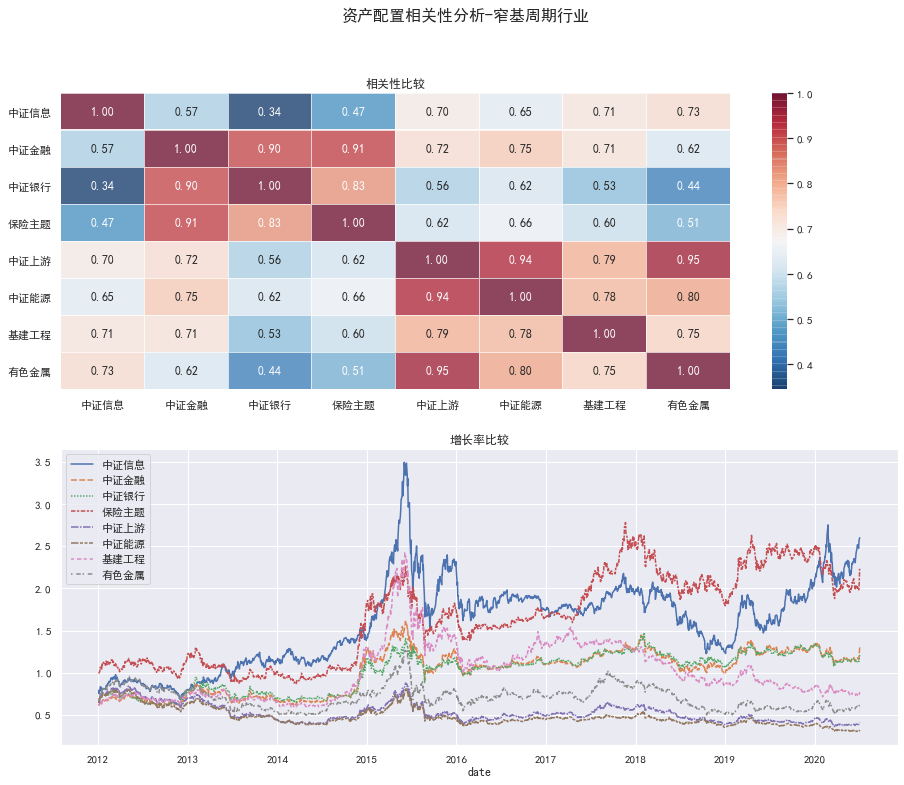

In [19]:
hangye_indices = {
    'SH000935': '中证信息',
    'SH000934': '中证金融',    
    'SZ399986': '中证银行',
    'SZ399809': '保险主题',    
    'SH000961': '中证上游',    
    'SH000928': '中证能源',    
    'SZ399995': '基建工程',
    'SH000819': '有色金属',}
comp(hangye_indices, title='资产配置相关性分析-窄基周期行业')

In [ ]:
进一步细分，可以挑选增长率好的品种

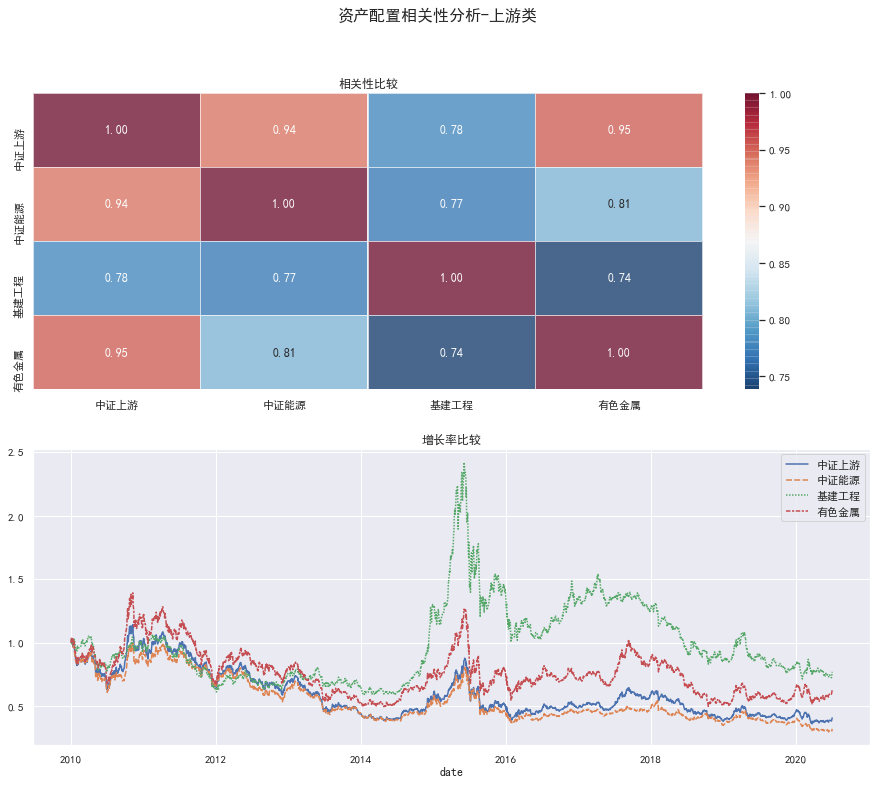

In [21]:
cycle_indices = {
    'SH000961': '中证上游',    
    'SH000928': '中证能源',    
    'SZ399995': '基建工程',
    'SH000819': '有色金属',
    
    }

comp(cycle_indices, title='资产配置相关性分析-上游类')

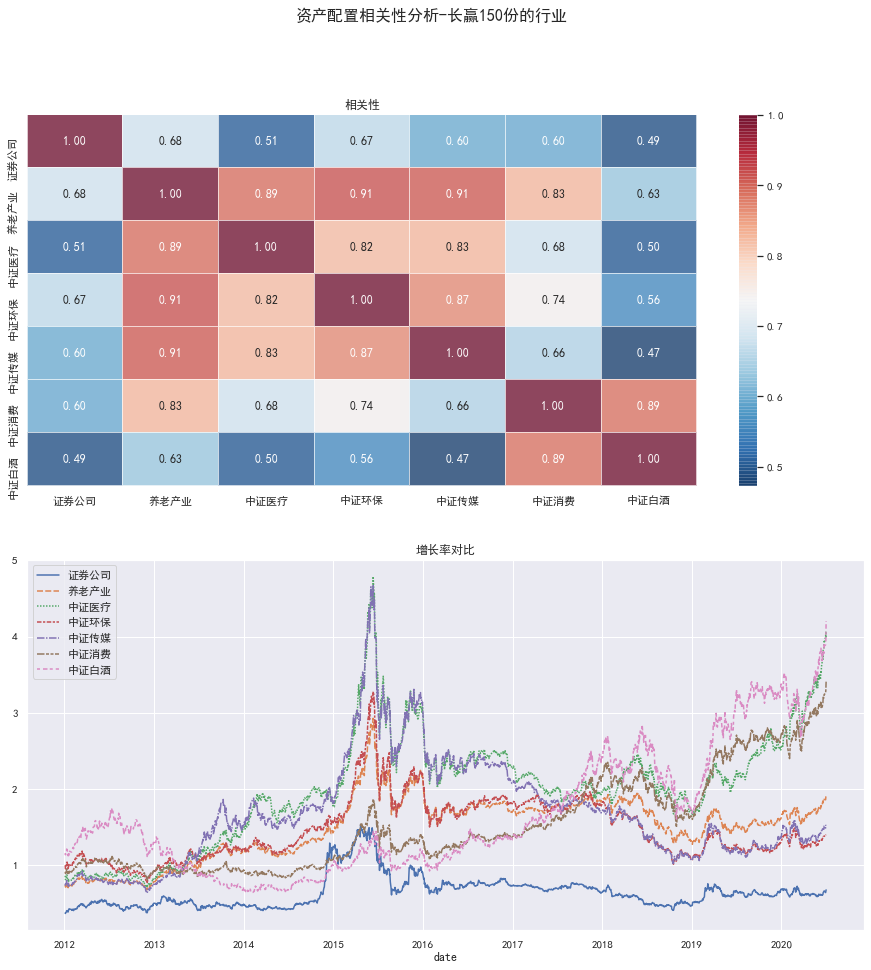

In [19]:
industries_indices = {
    'SZ399975': '证券公司',    
    'SZ399812': '养老产业',
    'SZ399989': '中证医疗',
    'SH000827': '中证环保',
    'SZ399971': '中证传媒',
    'SH000932': '中证消费',
    'SZ399997': '中证白酒',
    }
comp(industries_indices, title='资产配置相关性分析-长赢150份的行业')


In [ ]:
几个债券类分析，增长性没有可比性，因为暂时没有考虑分红和再投资的收益。

纯债、国债和其他收益债相关性要低，符合配置原则。

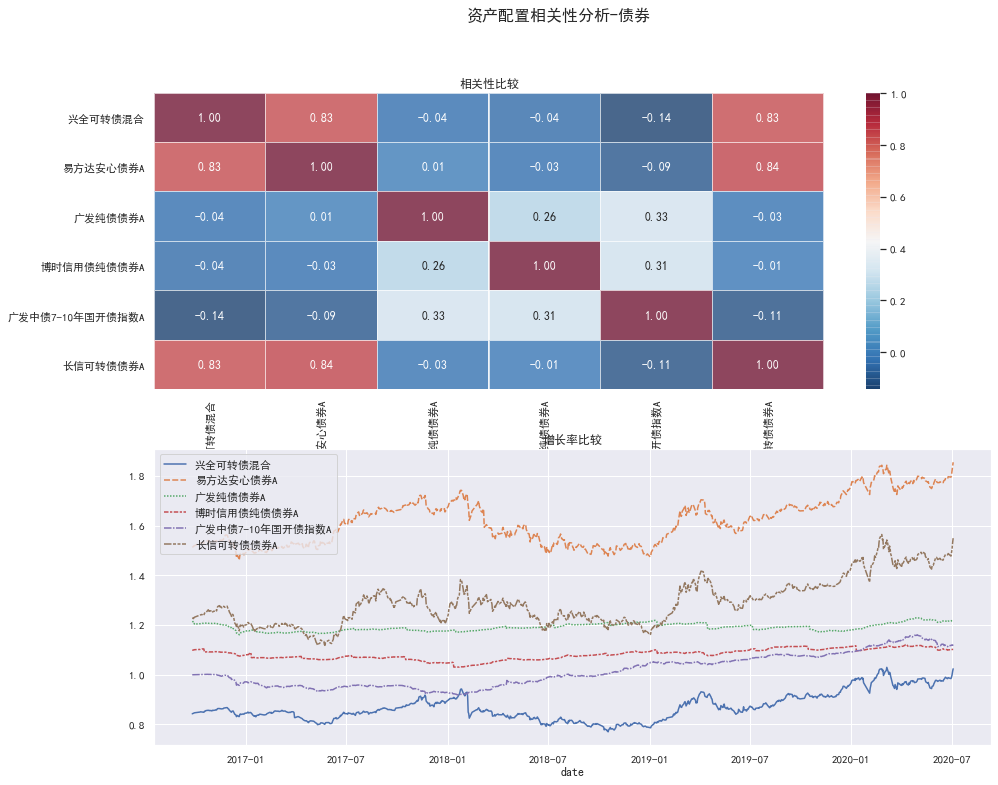

In [23]:
bonds = {
    'F340001': '兴全可转债混合',
    'F110027': '易方达安心债券A',
    'F270048': '广发纯债债券A',
    'F050027': '博时信用债纯债债券A',
    'F003376': '广发中债7-10年国开债指数A',
    'F519977': '长信可转债债券A',
}
comp(bonds, title='资产配置相关性分析-债券')


In [ ]:
本次喝酒吃药行情的酒类，中证白酒要好于中证酒。

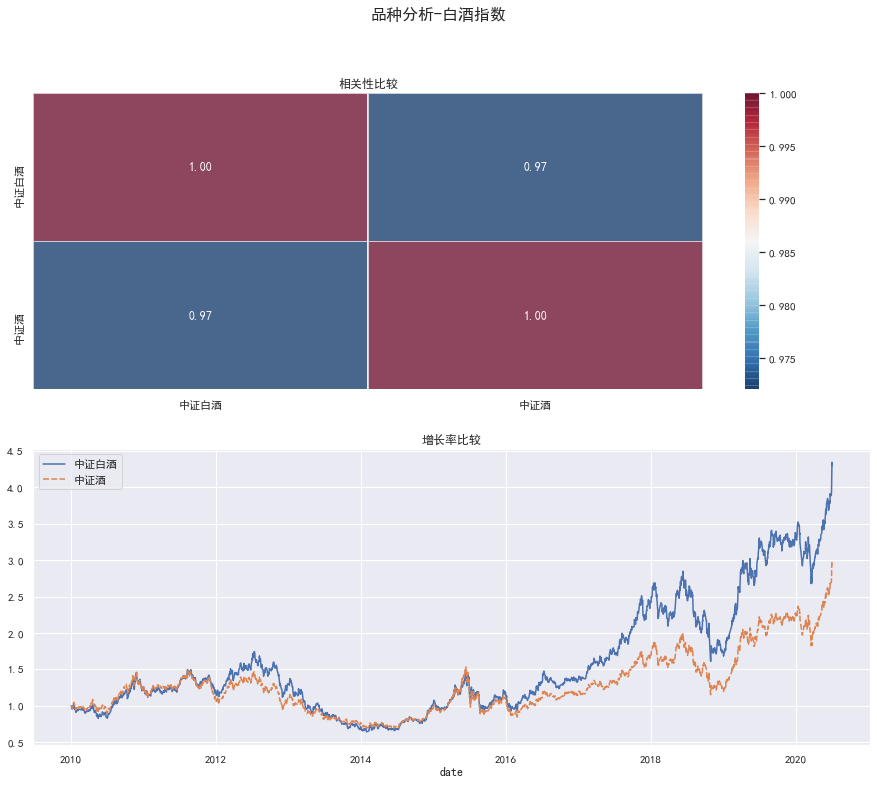

In [24]:
wine_indices = {
    'SZ399997': '中证白酒',
    'SZ399987': '中证酒',
}
comp(wine_indices, '品种分析-白酒指数')

In [ ]:
几只红利指数的分析，深圳红利要明显好于其他几只。

可以考虑用深圳红利部分替代中证红利的份额。

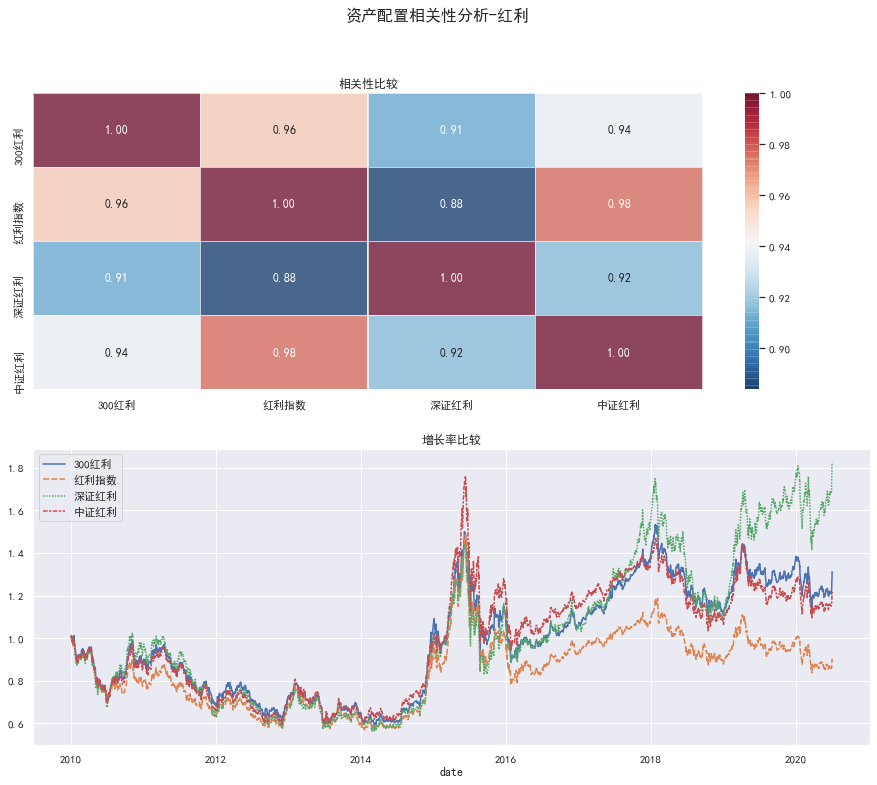

In [25]:
hongli_indices = {
                    'SH000821': '300红利',
                    'SH000015': '红利指数',
                    'SZ399324': '深证红利',
                    'SH000922': '中证红利',
}

comp(hongli_indices, '资产配置相关性分析-红利')


In [ ]:
喝酒吃药行情中的吃药指数对比。

托新冠所赐，生物医药等一绝后尘。

生物医药和国证医药都要好于150份中的全指医药，可以考虑替换。

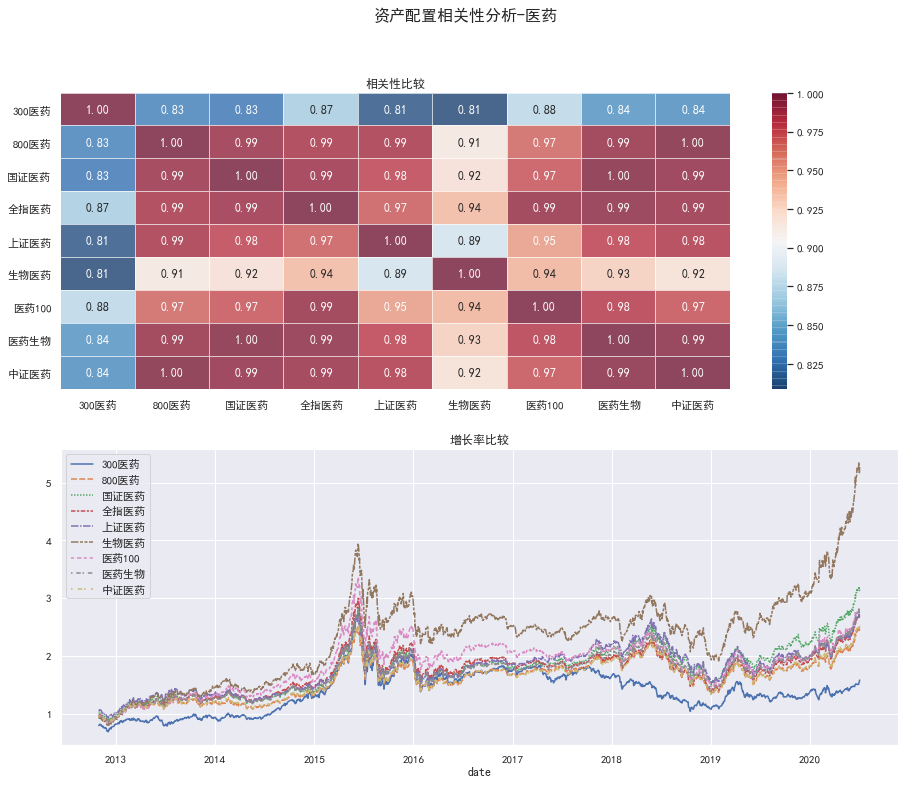

In [26]:
med_indices = {
    'SH000091': '300医药',
    'SH000841': '800医药',
    'SZ399394': '国证医药',
    'SH000991': '全指医药',
    'SH000037': '上证医药',
    'SZ399441': '生物医药',
    'SH000978': '医药100',
    'SH000808': '医药生物',
    'SH000933': '中证医药',
}

comp(med_indices, title='资产配置相关性分析-医药')

In [ ]:
金融类基本上不差什么

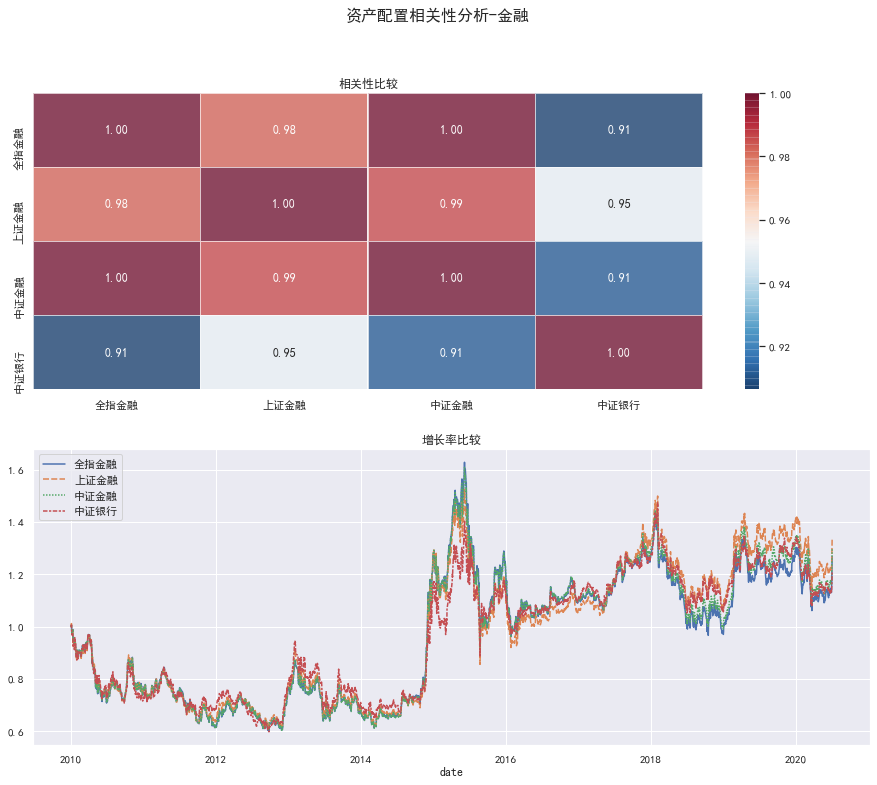

In [27]:
bank_indices = {
'SH000992': '全指金融',
'SH000038': '上证金融',
'SH000934': '中证金融',
'SZ399986': '中证银行',
}

comp(bank_indices, title='资产配置相关性分析-金融')

In [ ]:
计算机信息类

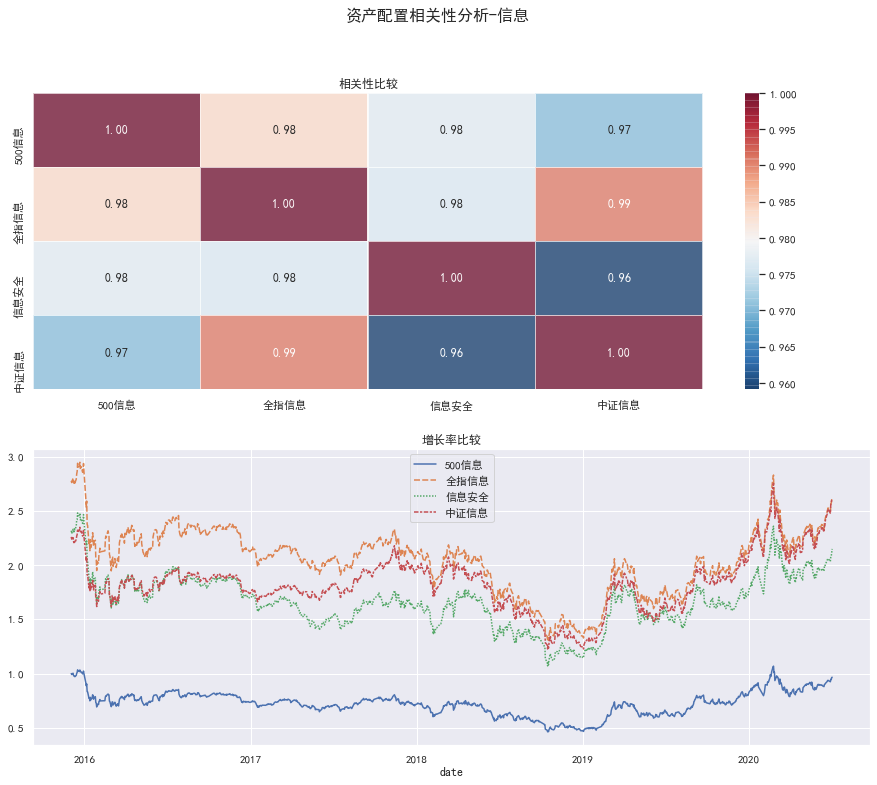

In [28]:
comp_indices = {
    'SH000858': '500信息',
    'SH000993': '全指信息',
    'SZ399994': '信息安全',
    'SH000935': '中证信息',
}

comp(comp_indices, title="资产配置相关性分析-信息")


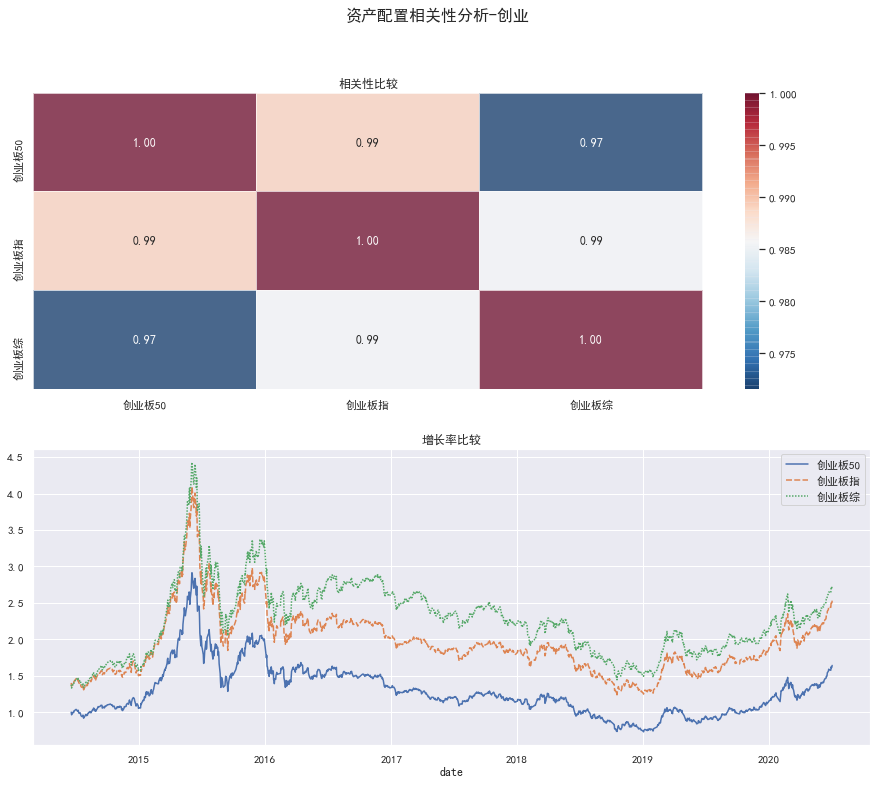

In [42]:
chuang_indices = {
    'SZ399673': '创业板50',
    'SZ399006': '创业板指',
    'SZ399102': '创业板综',
}

comp(chuang_indices, title='资产配置相关性分析-创业')

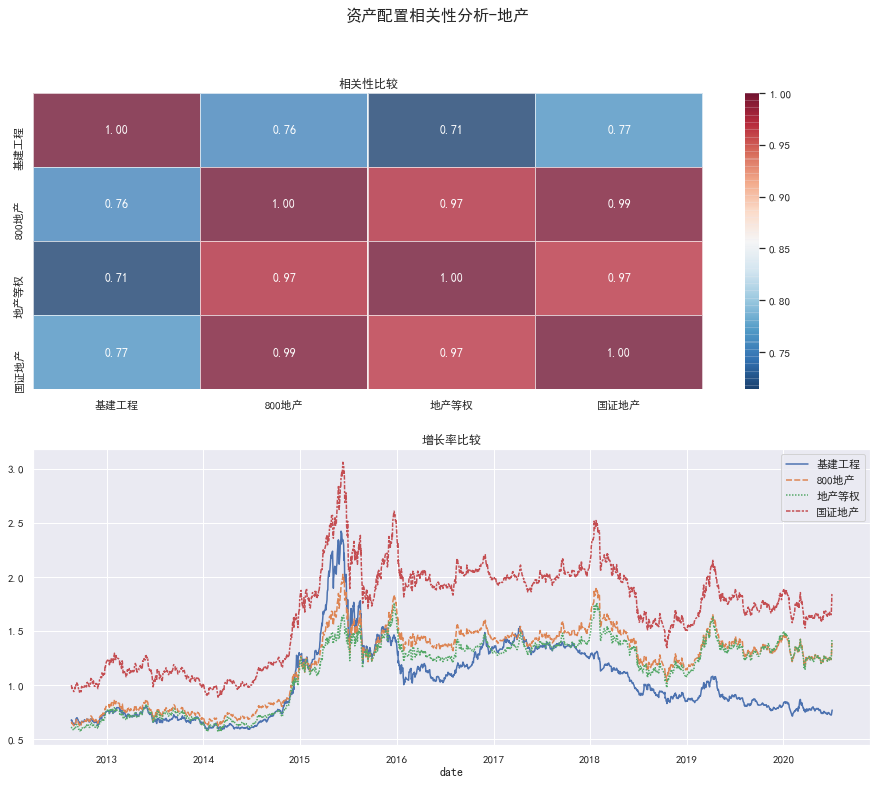

In [44]:
land_indices = {
    'SZ399995': '基建工程',
    'SZ399965': '800地产',
    'SZ399983': '地产等权',
    'SZ399393': '国证地产'
}


comp(land_indices, title='资产配置相关性分析-地产')

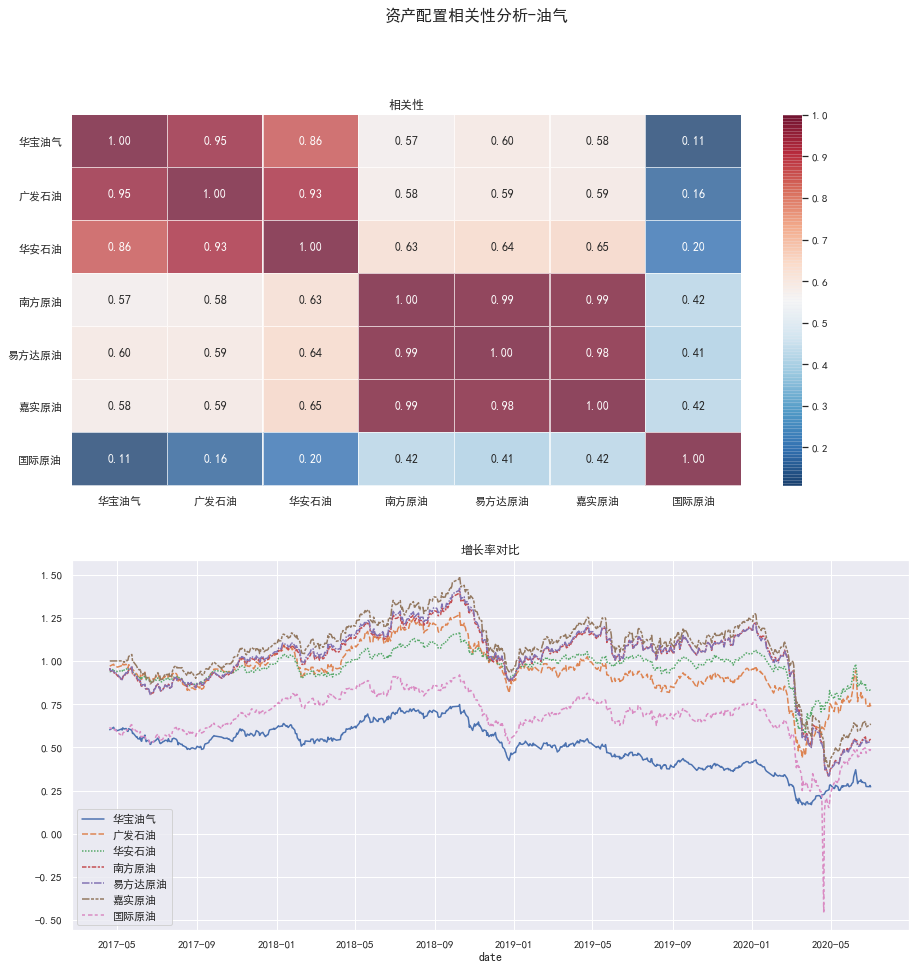

In [8]:
oil_funds = {
    "F162411": '华宝油气',
    "F162719": '广发石油',
    "F162719": '广发石油',
    "F160416": '华安石油',
    "F501018": '南方原油',
    "F161129": '易方达原油',
    "F160723": '嘉实原油',
    'commodities/crude-oil': '国际原油',
}

comp(oil_funds, title='资产配置相关性分析-油气')

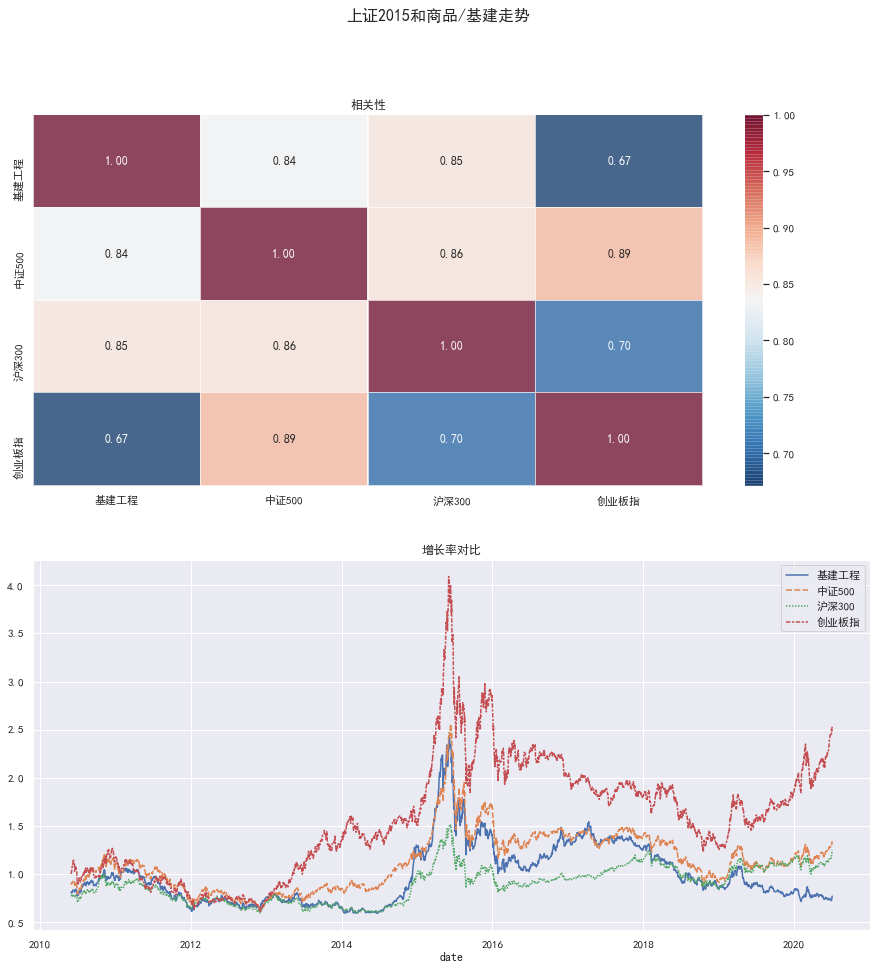

In [7]:
#上证2015和大宗商品价格走势关系图 #交易
metal_kuan_indices = {
    'SZ399995': '基建工程',
    'SH000905': '中证500',
    'SH000300': '沪深300',
    'SZ399006': '创业板指',
    }

comp(metal_kuan_indices, title='上证2015和商品/基建走势')

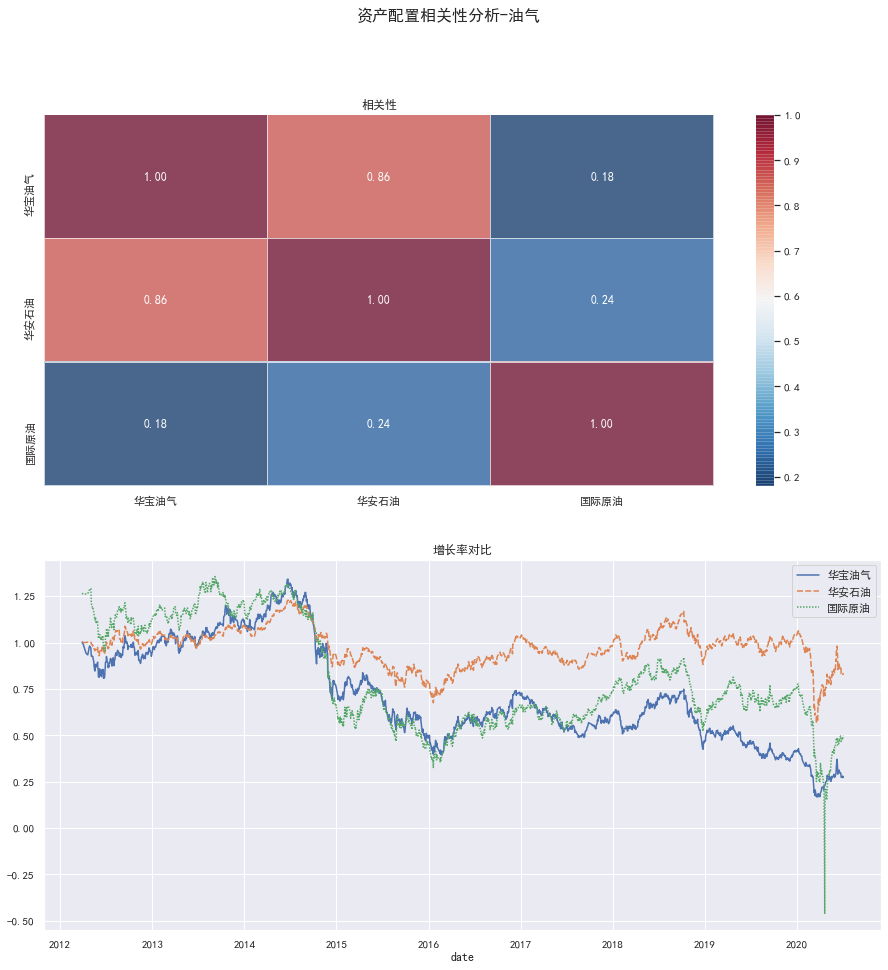

In [10]:
oil_funds = {
    "F162411": '华宝油气',
    "F160416": '华安石油',
    'commodities/crude-oil': '国际原油',
}

comp(oil_funds, title='资产配置相关性分析-油气')

In [47]:
xa.indexinfo('SH931079')

ValueError: could not convert string to float: '收盘价'